# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd  # <импорт библиотеки pandas>
import matplotlib.pyplot as plt   # <импорт библиотеки для создания графиков>

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')  # <чтение файла с данными с сохранением в data>

In [3]:
data.head(10) # <получение первых 10 строк таблицы data> 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
data.info() # <получение общей информации о данных в таблице data>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [5]:
data.describe()  # получение основных статистических данных в таблице data>

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [6]:
data.dtypes # просмотр типов данных

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment             object
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

In [7]:
data.isnull().sum() # подсчёт пропущенных значений 

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Рассмотрим полученную информацию подробнее.

Всего в таблице 22 столбца, тип данных - bool, object, int64, float64

Подробно разберём, какие в *data* столбцы и какую информацию они содержат:

airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
balcony — число балконов
ceiling_height — высота потолков (м)
cityCenters_nearest — расстояние до центра города (м)
days_exposition — сколько дней было размещено объявление (от публикации до снятия)
first_day_exposition — дата публикации
floor — этаж
floors_total — всего этажей в доме
is_apartment — апартаменты (булев тип)
kitchen_area — площадь кухни в квадратных метрах (м²)
last_price — цена на момент снятия с публикации
living_area — жилая площадь в квадратных метрах(м²)
locality_name — название населённого пункта
open_plan — свободная планировка (булев тип)
parks_around3000 — число парков в радиусе 3 км
parks_nearest — расстояние до ближайшего парка (м)
ponds_around3000 — число водоёмов в радиусе 3 км
ponds_nearest — расстояние до ближайшего водоёма (м)
rooms — число комнат
studio — квартира-студия (булев тип)
total_area — площадь квартиры в квадратных метрах (м²)
total_images — число фотографий квартиры в объявлении

Количество значений в столбцах различается. Это говорит о том, что в данных есть пропущенные значения.

### Вывод

Проблемы, которые нужно решать: пропуски, типы данных. Пропуски в balcony, parks_around3000, ponds_around3000 вероятно связаны с тем что, пользователь не указал количество балконов, парков и водоемов из-за их отсутствия. Заменим перечисленные пропуски на 0.
Пропуски в is_apartment, предположительно связаны с тем, что квартиры относятся к жилому фонду и не являются апартаментами. Такие пропуски заменим на булевое значение False. Часть пропусков в cityCenters_nearest предположительно связана с тем, что квартиры находятся в центре. 

### Шаг 2. Предобработка данных

In [8]:
data['is_apartment'] = data['is_apartment'].fillna(False) #замена типов данных
data['balcony'] = data['balcony'].fillna(0)
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
#data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(0)

In [9]:
ft_n = data['floors_total'].isna().sum() / data['floors_total'].count()
print('Пропуски в "floors_total" составляют: {:.2%}'.format(ft_n))

Пропуски в "floors_total" составляют: 0.36%


Пропусков в "floors_total" менее половины процента. Удалим их:

In [10]:
data.dropna(subset = ['floors_total'], inplace = True) # удаление строк с пропущенными значениями

In [11]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9118
floors_total                0
living_area              1870
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2231
balcony                     0
locality_name              48
airports_nearest         5532
cityCenters_nearest      5509
parks_around3000            0
parks_nearest           15568
ponds_around3000            0
ponds_nearest           14552
days_exposition          3172
dtype: int64

In [12]:
data['balcony']=data['balcony'].astype('int') #преобразование в тип данных int.
data['rooms']=data['rooms'].astype('int')
data['parks_around3000']=data['parks_around3000'].astype('int')
data['ponds_around3000']=data['ponds_around3000'].astype('int')
data['floors_total']=data['floors_total'].astype('int') 
data['last_price']=data['last_price'].astype('int') 

In [13]:
data.dtypes

total_images              int64
last_price                int64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total              int64
living_area             float64
floor                     int64
is_apartment               bool
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                   int64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000          int64
parks_nearest           float64
ponds_around3000          int64
ponds_nearest           float64
days_exposition         float64
dtype: object

### Выводы

Для days_exposition, airports_nearest, kitchen_area, living_area, ceiling_height нет подходящего значения на замену. Оставим эти значения пустыми. Отсутствие значения — тоже важный сигнал, который не нужно прятать.
К возможным причинам наличия пропусков можно отнести неполное предоставление данных прльзователями или сбой в автоматическом получении данных. 
Строк с пропущенными значения в floors_total всего 86, поэтому они удалены.
Значения balcony, rooms, parks_around3000, ponds_around3000, floors_total, last_price преобразованы в тип данных int.

### Шаг 3. Посчитайте и добавьте в таблицу

In [14]:
data['price_per_meter'] = (data['last_price']/ data['total_area']).astype('int') 
data['publication_date'] = pd.to_datetime(data['first_day_exposition']).dt.strftime('%d-%m-%y')

In [15]:
def floor_group(row): # функция возвращает категорию по доходам, по значению total_income, используя правила
    floor_flat = row['floor']
    last_floor = row['floors_total']
    if floor_flat == 1:
        return 'первый'
    if floor_flat == last_floor:
        return 'последний'
    return 'другой'
data['floor_group'] = data.apply(floor_group, axis = 1) #создание столбца на основании функции

In [16]:
data['plan_index'] = (data['living_area']/data['total_area']).round(2) #округление до 2 значений
data['kitchen_index'] = (data['kitchen_area']/data['total_area']).round(2)

In [17]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,publication_date,floor_group,plan_index,kitchen_index
0,20,13000000,108.00,2019-03-07T00:00:00,3,2.70,16,51.00,8,False,...,1,482.0,2,755.0,NaN,120370,07-03-19,другой,0.47,0.23
1,7,3350000,40.40,2018-12-04T00:00:00,1,NaN,11,18.60,1,False,...,0,NaN,0,NaN,81.0,82920,04-12-18,первый,0.46,0.27
2,10,5196000,56.00,2015-08-20T00:00:00,2,NaN,5,34.30,4,False,...,1,90.0,2,574.0,558.0,92785,20-08-15,другой,0.61,0.15
3,0,64900000,159.00,2015-07-24T00:00:00,3,NaN,14,NaN,9,False,...,2,84.0,3,234.0,424.0,408176,24-07-15,другой,NaN,NaN
4,2,10000000,100.00,2018-06-19T00:00:00,2,3.03,14,32.00,13,False,...,2,112.0,1,48.0,121.0,100000,19-06-18,другой,0.32,0.41
5,10,2890000,30.40,2018-09-10T00:00:00,1,NaN,12,14.40,5,False,...,0,NaN,0,NaN,55.0,95065,10-09-18,другой,0.47,0.30
6,6,3700000,37.30,2017-11-02T00:00:00,1,NaN,26,10.60,6,False,...,0,NaN,0,NaN,155.0,99195,02-11-17,другой,0.28,0.39
7,5,7915000,71.60,2019-04-18T00:00:00,2,NaN,24,NaN,22,False,...,0,NaN,0,NaN,NaN,110544,18-04-19,другой,NaN,0.26
8,20,2900000,33.16,2018-05-23T00:00:00,1,NaN,27,15.43,26,False,...,0,NaN,0,NaN,189.0,87454,23-05-18,другой,0.47,0.27
9,18,5400000,61.00,2017-02-26T00:00:00,3,2.50,9,43.60,7,False,...,0,NaN,0,NaN,289.0,88524,26-02-17,другой,0.71,0.11


### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

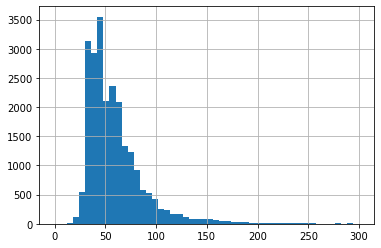

In [18]:
data['total_area'].hist(bins=50, range=(0, 300))  #построение гистрограммы

Наиболее распространены квартиры площадью около 40 кв.м. Почти в два раза меньше квартир площадью 70 кв.м. Квартиры площадью более 150 кв встречаются редко. 

<font color='blue'> Хорошо. </font>

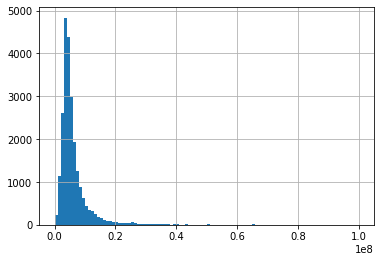

In [19]:
data['last_price'].hist(bins=100, range=(0, 1e+08)) #построение гистрограммы

Больше всего квартир стоимостью около 3-5 млн.руб. Почти в 3 раза меньше квартир стоимостью около 10 млн.руб. Квартиры стоимостью более 20 млн.руб совсем редки.

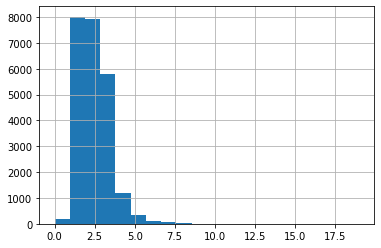

In [20]:
data['rooms'].hist(bins=20) #построение гистрограммы

1-2 комнатные квартиры встречаются в продаже чаще других. Примерно на треть меньше трехкомнатных. 5-ти комнатные встречаются редко.

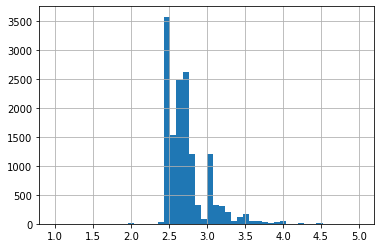

In [21]:
data['ceiling_height'].hist(bins=50, range=(1, 5)) #построение гистрограммы

В массовой жилой недвижимости распространены квартиры с высотой потолков 2.5-2.8 метра, что наглядно демонстрируют гистрограмма. Почти в 3 раза меньше квартир с высотой потолков 3м. Совсем редко встречаются потолки около 4.5м.

In [22]:
data['days_exposition'].describe() # Получение информации о данных в days_exposition

count    20441.000000
mean       180.884839
std        219.685543
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Cреднее значение почти в 2 раза больше медианы. Это говорит о том, что в распределении длинный хвост высоких значений (или несколько очень больших значений), влияющих на среднее, но не на медиану.

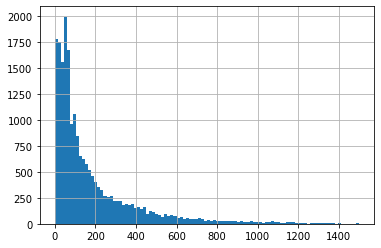

In [23]:
data['days_exposition'].hist(bins=100, range=(0, 1500))   #построение гистрограммы

(-100, 1000)

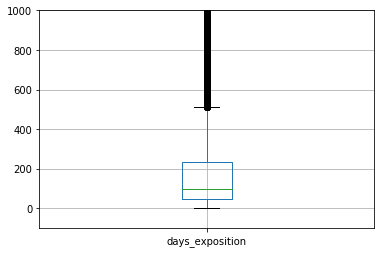

In [24]:
data.boxplot('days_exposition')  #построение диаграммы размаха 
plt.ylim(-100, 1000)


Большинство значений находятся в "ящике", ограниченным значениями от 45 до 232 дней. Медиана соответствует значению 95 дней. Нижний «ус» находится на границе с 0. Верхний заканчивается около 900 дней — это 1.5 межквартильного размаха, добавленного к 3-му квартилю. Это ориентировочная граница нормального размаха.

Продажи в большинстве случаев занимают от 45 до 232 дней. Очень быстрые продажи приходятся на временной промежуток от 0 до 45 дней, необычно долгие - от 232 дней. 

In [25]:
len(data.query('days_exposition > 800'))/len(data) #рассчет доли значений, находящихся выше принятой границы в 800 дней, от общего числа значений в таблице

0.024901537288781604

Доля аномально долгих продаж составляет 2.5%. Небольшая величина, от которой можно избавиться.

In [26]:
data = data.query('days_exposition < 800') #получение среза из исходной таблицы

In [27]:
data_corr_price = data.corr()
(data_corr_price.loc[:, 'price_per_meter']).sort_values(ascending=False).to_frame() # корреляция цены за метр относительно других параметров

,price_per_meter
price_per_meter,1.000000
last_price,0.733812
kitchen_area,0.384564
total_area,0.299326
ponds_around3000,0.290075
parks_around3000,0.276078
living_area,0.215740
kitchen_index,0.161849
floors_total,0.155278
ceiling_height,0.137767


В соответствии со значениями коэфициента корреляции, наиболее значимыми факторами влияющими на стоимость кв. метра недвижимости являются: площадь кухни, общая и жилая площади, наличие водоемов и парков в радиусе 3км.

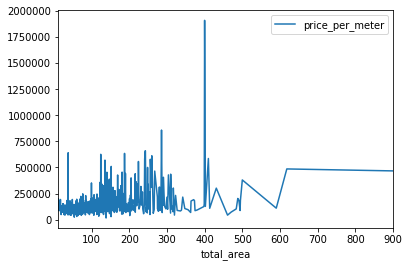

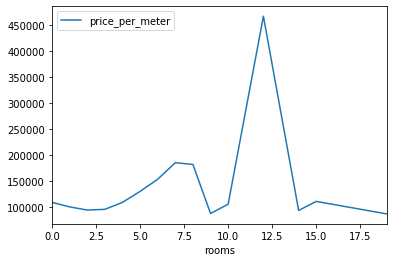

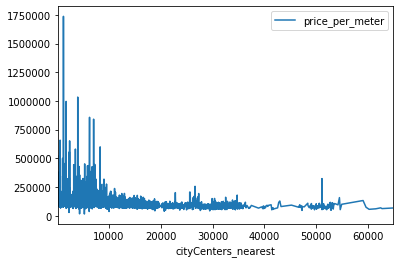

In [28]:
for column in data[['total_area', 'rooms', 'cityCenters_nearest', ]].columns:
    data.pivot_table(index=column, values='price_per_meter').plot()

Стоимость кв.метра квартир имеет тенденцию к снижению по мере удаления от центра. На удалении от центра в 50-60 км. стоимость резко поднимается до пиковых значений около 13 млн.руб. за кв.метр. 

In [29]:
data.pivot_table(index='floor_group', values='price_per_meter', aggfunc='median').sort_values(by='price_per_meter', ascending=False)
#сводная таблица со этажем(первы, последним, другим) и ценой

,price_per_meter
floor_group,
другой,97014.0
последний,87511.0
первый,80367.5


Квартиры на первых и последних этажа - самые дешевые. 

In [30]:
a = pd.to_datetime(data['publication_date']).dt.weekday_name  
data.pivot_table(index=a, values='price_per_meter', aggfunc='median').sort_values(by='price_per_meter', ascending=False)
#сводная таблица с днем недели и стоимостью

,price_per_meter
publication_date,
Friday,94808.0
Thursday,94390.0
Saturday,94249.5
Monday,93750.0
Wednesday,93578.0
Tuesday,93548.0
Sunday,92857.0


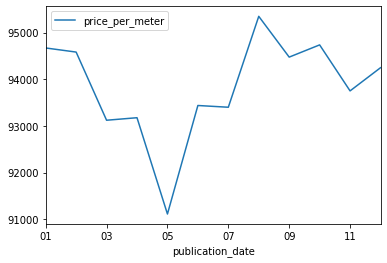

In [31]:
f = pd.to_datetime(data['publication_date']).dt.strftime('%m')
data.pivot_table(index=f, values='price_per_meter', aggfunc='median').plot()
#график зависимости цены от месяца публикации

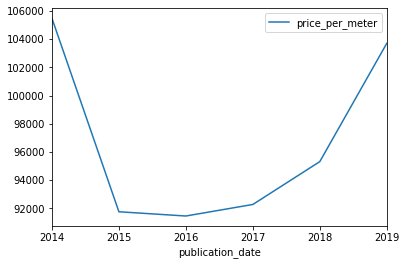

In [32]:
h = pd.to_datetime(data['publication_date']).dt.strftime('%Y')
data.pivot_table(index=h, values='price_per_meter', aggfunc='median').plot()
#график зависимости цены от года публикации

Обьявления о продажах, опубликованных в пятницу, имеют самую высокую цену среди других дней. Самую низкую - в воскресенье. 

С января стоимость недвижимость снижается до минимума в начале мая. Затем происоходит рост до максимальных значений в августе.

С начала 2014 года наблюдается падение стоимости недвижимости до конца года. В период с начала 2015 до 2017 соимость остается примерно на одном уровне. В начале 2017 недвижимость уверенно паднимается в стоимости.

In [33]:
list_name = data.pivot_table(index='locality_name', values='price_per_meter', aggfunc=['count', 'mean'])

In [34]:
list_name.columns = ['count', 'mean_price']

In [35]:
list_name['mean_price']=list_name['mean_price'].astype('int') 


In [36]:
top10 = (list_name.sort_values(by='count', ascending=False)).head(10) # топ 10 населённых пунктов сортированный в порядке убывания количества объявлений

In [37]:
top10

,count,mean_price
locality_name,,
Санкт-Петербург,13156,112105
посёлок Мурино,502,85892
посёлок Шушары,400,77775
Всеволожск,330,68615
Колпино,304,74795
посёлок Парголово,297,89386
Пушкин,294,101909
деревня Кудрово,290,92520
Гатчина,258,68064


Список 10 населённых пунктов с наибольшим числом объявлений со средней ценой квадратного метра.

In [38]:
top10.sort_values(by='mean_price', ascending=False)# список сортированный в порядке убывания средней цены квадратного метра 

,count,mean_price
locality_name,,
Санкт-Петербург,13156,112105
Пушкин,294,101909
деревня Кудрово,290,92520
посёлок Парголово,297,89386
посёлок Мурино,502,85892
посёлок Шушары,400,77775
Колпино,304,74795
Всеволожск,330,68615
Гатчина,258,68064


Населённый пункт с самой средней высокой стоимостью жилья - Санкт-Петербург	, самой низкой - Выборг.

In [39]:
data['cityCenters_nearest'] = (data['cityCenters_nearest']/1000).round()
#перевод расстояния до центра в км и округление в cityCenters_nearest

In [40]:
p = data.query('locality_name == "Санкт-Петербург"') # срез данных по локации Санкт-Петербург

In [41]:
с = p.pivot_table(index='cityCenters_nearest', values='last_price') #сводная таблица цены за метри расстояния
с.head(10)

,last_price
cityCenters_nearest,
0.0,2.916941e+07
1.0,1.915509e+07
2.0,1.784502e+07
3.0,1.034922e+07
4.0,1.287501e+07
5.0,1.342709e+07
6.0,1.454847e+07
7.0,1.362890e+07
8.0,9.359160e+06


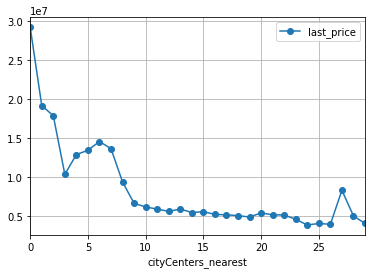

In [42]:
с.plot(style='o-', grid=True) #график изменения цены в зависимости от расстояния до центра 

В точке 7 км наблюдается резкое и устойчивое снижение стоимости недвижимости до 26 км. Примем 7км за границу центральной зоны.

In [43]:
data1 = data[['total_area', 'last_price', 'rooms', 'locality_name', 'ceiling_height', 'cityCenters_nearest']]
data1.query('(cityCenters_nearest < 7)&(locality_name == "Санкт-Петербург")').describe() 
#получение информации о параметрах недвижимости в центральной зоне (радиус 7км)

,total_area,last_price,rooms,ceiling_height,cityCenters_nearest
count,2420.000000,2.420000e+03,2420.000000,1507.000000,2420.000000
mean,90.821665,1.412866e+07,2.804545,3.118407,4.174380
std,57.450296,2.587207e+07,1.449230,0.719827,1.513398
min,12.000000,1.600000e+06,0.000000,2.400000,0.000000
25%,55.600000,6.500000e+06,2.000000,2.840000,3.000000
50%,77.000000,8.800000e+06,3.000000,3.000000,4.000000
75%,106.750000,1.306250e+07,3.000000,3.300000,5.000000
max,618.000000,7.630000e+08,19.000000,27.000000,6.000000


В центральной части города преобладают трехкомнатные квартиры общей площадью свыше 77кв.м с высотой потолков 3м и средней стоимостью от 8.8 миллиона рублей.

In [44]:
data.publication_date=pd.to_datetime(data.publication_date)
data.publication_date=pd.to_numeric(data.publication_date) #изменение формата даты

In [45]:
data2 = data.query('(cityCenters_nearest < 7)&(locality_name == "Санкт-Петербург")')
corr_price = data2.corr()
(corr_price.loc[:, 'price_per_meter']).sort_values(ascending=False) 
#Получение коэфициентов корреляции для центральной части города

price_per_meter        1.000000
last_price             0.821343
kitchen_area           0.330496
total_area             0.269166
living_area            0.192302
total_images           0.150113
floor                  0.149590
airports_nearest       0.145236
kitchen_index          0.135041
floors_total           0.129724
balcony                0.127974
ponds_around3000       0.106010
parks_around3000       0.101657
ceiling_height         0.073517
parks_nearest          0.028922
rooms                  0.019447
publication_date       0.017206
days_exposition        0.009160
open_plan             -0.001682
is_apartment          -0.001909
studio                -0.003990
cityCenters_nearest   -0.031639
ponds_nearest         -0.079871
plan_index            -0.132343
Name: price_per_meter, dtype: float64

Наиболее высокое значение коэфициента корреляции относительно цены кв.метра недвижимости в центральной части Санкт-Петербурга 
наблюдается у следующих параметров: площадь кухни, общая и жилая площади, этаж и расстояние до аэропорта.

Сравним зависимость цены за квадратный метр в целом по Санкт-Петербугу и его центральной частью.

In [46]:
data_corr_price = data.corr()
(data_corr_price.loc[:, 'price_per_meter']).sort_values(ascending=False) # корреляция цены за метр относительно других параметров

price_per_meter        1.000000
last_price             0.733812
kitchen_area           0.384564
total_area             0.299326
ponds_around3000       0.290075
parks_around3000       0.276078
living_area            0.215740
kitchen_index          0.161849
floors_total           0.155278
ceiling_height         0.137767
floor                  0.136335
total_images           0.127508
rooms                  0.050208
balcony                0.032492
days_exposition        0.030658
parks_nearest          0.021617
is_apartment           0.020099
studio                 0.019523
open_plan              0.011706
publication_date       0.007894
airports_nearest      -0.040648
ponds_nearest         -0.102550
plan_index            -0.149232
cityCenters_nearest   -0.315955
Name: price_per_meter, dtype: float64

В обоих случаях самым значимым фактором является площадь недвижимости. Также к общим значимым фактором относится этаж. 
В отличии от ситуации со всем городом, в центральной части менее значимы наличие парков и водоемов поблизости. Значимым фактором для недвижимости в центре является количество фото.  

In [47]:
p = pd.to_datetime(data['publication_date']).dt.weekday_name  
data2.pivot_table(index=a, values='price_per_meter', aggfunc='median').sort_values(by='price_per_meter', ascending=False)
#сводная таблица с днем недели и стоимостью для центральной части города

,price_per_meter
publication_date,
Friday,124151.5
Wednesday,123166.0
Sunday,121136.0
Saturday,121050.5
Monday,119522.0
Thursday,117520.5
Tuesday,117289.0


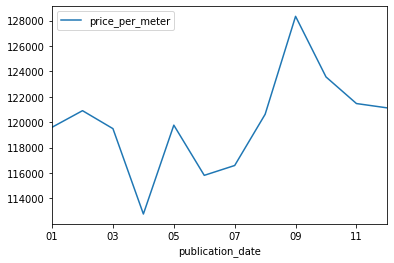

In [48]:
f = pd.to_datetime(data['publication_date']).dt.strftime('%m')
data2.pivot_table(index=f, values='price_per_meter', aggfunc='median').plot()
#график зависимости цены от месяца публикации для центральной части города

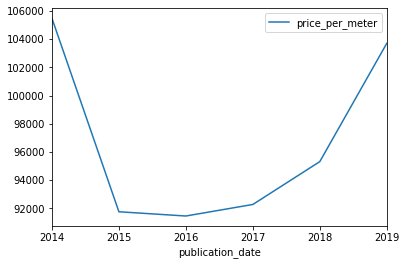

In [49]:
h = pd.to_datetime(data['publication_date']).dt.strftime('%Y')
data.pivot_table(index=h, values='price_per_meter', aggfunc='median').plot()
#график зависимости цены от года публикации для центральной части города

Обьявления о продажах квартир центральной части города, опубликованных в пятницу, имеют самую высокую цену среди других дней. Самую низкую - в четверг. 

В апреля наблюдается минимум, в сентябре - максимум. 

С начала 2014 года наблюдается резкое падение стоимости недвижимости, с начала 2015 года почти не снижается. С 2016 недвижимость плавно поднимается в стоимости. С 2018 происходит резкий рост.

### Шаг 5. Общий вывод

По результатам исследования установлены параметры, имеющие значение в формирование стоимость квадратного метра недвижимости. 
Ключевым фактором является локация квартиры относительно центра города. Также существенное значение имеет наличие водоема и парка в окрестностях. В конце августа происходит спрос на недвижимость, что отражает график с ростом стоимости недвижимости. 

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санк-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [50]:
import pandas as pd  # <импорт библиотеки pandas>
import matplotlib.pyplot as plt   # <импорт библиотеки для создания графиков>

In [51]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')  # <чтение файла с данными с сохранением в data>

In [52]:
data.head(10) # <получение первых 10 строк таблицы data> 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [53]:
data.info() # <получение общей информации о данных в таблице data>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [54]:
data.describe()  # получение основных статистических данных в таблице data>

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [55]:
data.dtypes # просмотр типов данных

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment             object
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

In [56]:
data.isnull().sum() # подсчёт пропущенных значений 

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Рассмотрим полученную информацию подробнее.

Всего в таблице 22 столбца, тип данных - bool, object, int64, float64

Подробно разберём, какие в *data* столбцы и какую информацию они содержат:

airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
balcony — число балконов
ceiling_height — высота потолков (м)
cityCenters_nearest — расстояние до центра города (м)
days_exposition — сколько дней было размещено объявление (от публикации до снятия)
first_day_exposition — дата публикации
floor — этаж
floors_total — всего этажей в доме
is_apartment — апартаменты (булев тип)
kitchen_area — площадь кухни в квадратных метрах (м²)
last_price — цена на момент снятия с публикации
living_area — жилая площадь в квадратных метрах(м²)
locality_name — название населённого пункта
open_plan — свободная планировка (булев тип)
parks_around3000 — число парков в радиусе 3 км
parks_nearest — расстояние до ближайшего парка (м)
ponds_around3000 — число водоёмов в радиусе 3 км
ponds_nearest — расстояние до ближайшего водоёма (м)
rooms — число комнат
studio — квартира-студия (булев тип)
total_area — площадь квартиры в квадратных метрах (м²)
total_images — число фотографий квартиры в объявлении

Количество значений в столбцах различается. Это говорит о том, что в данных есть пропущенные значения.

### Вывод

Проблемы, которые нужно решать: пропуски, типы данных. Пропуски в balcony, parks_around3000, ponds_around3000 вероятно связаны с тем что, пользователь не указал количество балконов, парков и водоемов из-за их отсутствия. Заменим перечисленные пропуски на 0. Пропуски в is_apartment, предположительно связаны с тем, что квартиры относятся к жилому фонду и не являются апартаментами. Такие пропуски заменим на булевое значение False. Пропуски в cityCenters_nearest предположительно связаны с тем, что квартиры находятся в центре. Логично заменить их на 0. 

### Шаг 2. Предобработка данных

In [57]:
data['is_apartment'] = data['is_apartment'].fillna(False) #замена типов данных
data['balcony'] = data['balcony'].fillna(0)
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(0)

In [58]:
data.dropna(subset = ['floors_total'], inplace = True) # удаление строк с пропущенными значениями

In [59]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9118
floors_total                0
living_area              1870
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2231
balcony                     0
locality_name              48
airports_nearest         5532
cityCenters_nearest         0
parks_around3000            0
parks_nearest           15568
ponds_around3000            0
ponds_nearest           14552
days_exposition          3172
dtype: int64

In [60]:
data['balcony']=data['balcony'].astype('int') #преобразование в тип данных int.
data['rooms']=data['rooms'].astype('int')
data['parks_around3000']=data['parks_around3000'].astype('int')
data['ponds_around3000']=data['ponds_around3000'].astype('int')
data['floors_total']=data['floors_total'].astype('int') 
data['last_price']=data['last_price'].astype('int') 

In [61]:
data.dtypes

total_images              int64
last_price                int64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total              int64
living_area             float64
floor                     int64
is_apartment               bool
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                   int64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000          int64
parks_nearest           float64
ponds_around3000          int64
ponds_nearest           float64
days_exposition         float64
dtype: object

### Выводы

Для days_exposition, airports_nearest, kitchen_area, living_area, ceiling_height нет подходящего значения на замену. Оставим эти значения пустыми. Отсутствие значения — тоже важный сигнал, который не нужно прятать.
К возможным причинам наличия пропусков можно отнести неполное предоставление данных прльзователями или сбой в автоматическом получении данных. 
Строк с пропущенными значения в floors_total всего 86, поэтому они удалены.
Значения balcony, rooms, parks_around3000, ponds_around3000, floors_total, last_price преобразованы в тип данных int.

### Шаг 3. Посчитайте и добавьте в таблицу

In [62]:
data['price_per_meter'] = (data['last_price']/ data['total_area']).astype('int') 
data['publication_date'] = pd.to_datetime(data['first_day_exposition']).dt.strftime('%d-%m-%y')

In [63]:
def floor_group(row): # функция возвращает категорию по доходам, по значению total_income, используя правила
    floor_flat = row['floor']
    last_floor = row['floors_total']
    if floor_flat == 1:
        return 'первый'
    if floor_flat == last_floor:
        return 'последний'
    return 'другой'
data['floor_group'] = data.apply(floor_group, axis = 1) #создание столбца на основании функции

In [64]:
data['plan_index'] = (data['living_area']/data['total_area']).round(2) #округление до 2 значений
data['kitchen_index'] = (data['kitchen_area']/data['total_area']).round(2)

In [65]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,publication_date,floor_group,plan_index,kitchen_index
0,20,13000000,108.00,2019-03-07T00:00:00,3,2.70,16,51.00,8,False,...,1,482.0,2,755.0,NaN,120370,07-03-19,другой,0.47,0.23
1,7,3350000,40.40,2018-12-04T00:00:00,1,NaN,11,18.60,1,False,...,0,NaN,0,NaN,81.0,82920,04-12-18,первый,0.46,0.27
2,10,5196000,56.00,2015-08-20T00:00:00,2,NaN,5,34.30,4,False,...,1,90.0,2,574.0,558.0,92785,20-08-15,другой,0.61,0.15
3,0,64900000,159.00,2015-07-24T00:00:00,3,NaN,14,NaN,9,False,...,2,84.0,3,234.0,424.0,408176,24-07-15,другой,NaN,NaN
4,2,10000000,100.00,2018-06-19T00:00:00,2,3.03,14,32.00,13,False,...,2,112.0,1,48.0,121.0,100000,19-06-18,другой,0.32,0.41
5,10,2890000,30.40,2018-09-10T00:00:00,1,NaN,12,14.40,5,False,...,0,NaN,0,NaN,55.0,95065,10-09-18,другой,0.47,0.30
6,6,3700000,37.30,2017-11-02T00:00:00,1,NaN,26,10.60,6,False,...,0,NaN,0,NaN,155.0,99195,02-11-17,другой,0.28,0.39
7,5,7915000,71.60,2019-04-18T00:00:00,2,NaN,24,NaN,22,False,...,0,NaN,0,NaN,NaN,110544,18-04-19,другой,NaN,0.26
8,20,2900000,33.16,2018-05-23T00:00:00,1,NaN,27,15.43,26,False,...,0,NaN,0,NaN,189.0,87454,23-05-18,другой,0.47,0.27
9,18,5400000,61.00,2017-02-26T00:00:00,3,2.50,9,43.60,7,False,...,0,NaN,0,NaN,289.0,88524,26-02-17,другой,0.71,0.11


### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

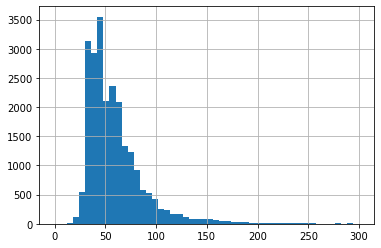

In [66]:
data['total_area'].hist(bins=50, range=(0, 300))  #построение гистрограммы

Наиболее распространены квартиры площадью около 40 кв.м. Почти в два раза меньше квартир площадью 70 кв.м. Квартиры площадью более 150 кв встречаются редко. 

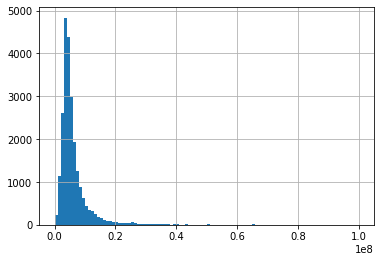

In [67]:
data['last_price'].hist(bins=100, range=(0, 1e+08)) #построение гистрограммы

Больше всего квартир стоимостью около 3-5 млн.руб. Почти в 3 раза меньше квартир стоимостью около 10 млн.руб. Квартиры стоимостью более 20 млн.руб совсем редки.

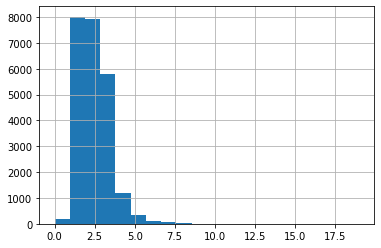

In [68]:
data['rooms'].hist(bins=20) #построение гистрограммы

1-2 комнатные квартиры встречаются в продаже чаще других. Примерно на треть меньше трехкомнатных. 5-ти комнатные встречаются редко.

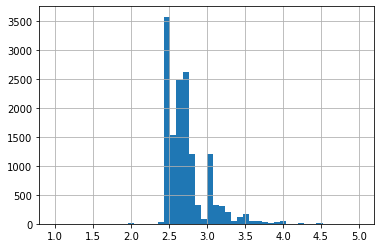

In [69]:
data['ceiling_height'].hist(bins=50, range=(1, 5)) #построение гистрограммы

В массовой жилой недвижимости распространены квартиры с высотой потолков 2.5-2.8 метра, что наглядно демонстрируют гистрограмма. Почти в 3 раза меньше квартир с высотой потолков 3м. Совсем редко встречаются потолки около 4.5м.

In [70]:
data['days_exposition'].describe() # Получение информации о данных в days_exposition

count    20441.000000
mean       180.884839
std        219.685543
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Cреднее значение почти в 2 раза больше медианы. Это говорит о том, что в распределении длинный хвост высоких значений (или несколько очень больших значений), влияющих на среднее, но не на медиану.

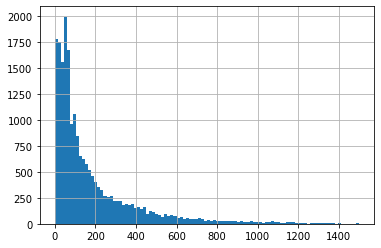

In [71]:
data['days_exposition'].hist(bins=100, range=(0, 1500))   #построение гистрограммы

(-100, 1000)

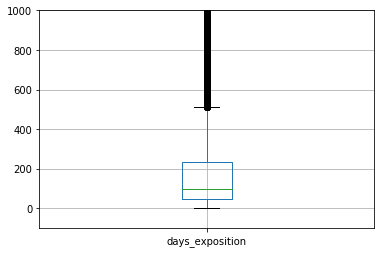

In [72]:
data.boxplot('days_exposition')  #построение диаграммы размаха 
plt.ylim(-100, 1000)


Большинство значений находятся в "ящике", ограниченным значениями от 45 до 232 дней. Медиана соответствует значению 95 дней. Нижний «ус» находится на границе с 0. Верхний заканчивается около 900 дней — это 1.5 межквартильного размаха, добавленного к 3-му квартилю. Это ориентировочная граница нормального размаха.

Продажи в большинстве случаев занимают от 45 до 232 дней. Очень быстрые продажи приходятся на временной промежуток от 0 до 45 дней, необычно долгие - от 232 дней. 

In [73]:
len(data.query('days_exposition > 800'))/len(data) #рассчет доли значений, находящихся выше принятой границы в 800 дней, от общего числа значений в таблице

0.024901537288781604

Доля аномально долгих продаж составляет 2.5%. Небольшая величина, от которой можно избавиться.

In [74]:
data = data.query('days_exposition < 800') #получение среза из исходной таблицы

In [75]:
data_corr_price = data.corr()
(data_corr_price.loc[:, 'price_per_meter']).sort_values(ascending=False) # корреляция цены за метр относительно других параметров

price_per_meter        1.000000
last_price             0.733812
kitchen_area           0.384564
total_area             0.299326
ponds_around3000       0.290075
parks_around3000       0.276078
living_area            0.215740
kitchen_index          0.161849
floors_total           0.155278
ceiling_height         0.137767
floor                  0.136335
total_images           0.127508
rooms                  0.050208
cityCenters_nearest    0.036986
balcony                0.032492
days_exposition        0.030658
parks_nearest          0.021617
is_apartment           0.020099
studio                 0.019523
open_plan              0.011706
airports_nearest      -0.040648
ponds_nearest         -0.102550
plan_index            -0.149232
Name: price_per_meter, dtype: float64

В соответствии со значениями коэфициента корреляции, наиболее значимыми факторами влияющими на стоимость кв. метра недвижимости являются: площадь кухни, общая и жилая площади, наличие водоемов и парков в радиусе 3км.

In [76]:
def dep_price(column): #создание функции для построения графика зависимости цены от выборочных факторов
    a = data.pivot_table(index=column, values='price_per_meter').plot()
    return a 

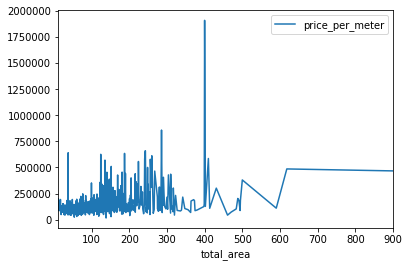

In [77]:
dep_price('total_area')

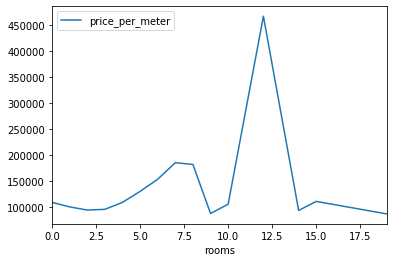

In [78]:
dep_price('rooms')

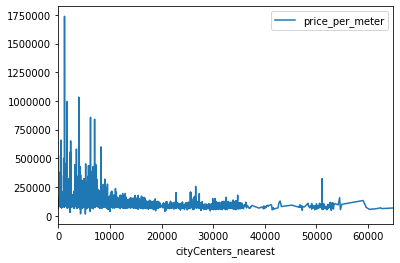

In [79]:
dep_price('cityCenters_nearest')

Стоимость кв.метра квартир имеет тенденцию к снижению по мере удаления от центра. На удалении от центра в 50-60 км. стоимость резко поднимается до пиковых значений около 13 млн.руб. за кв.метр. 

In [80]:
data.pivot_table(index='floor_group', values='price_per_meter', aggfunc='median').sort_values(by='price_per_meter', ascending=False)
#сводная таблица со этажем(первы, последним, другим) и ценой

,price_per_meter
floor_group,
другой,97014.0
последний,87511.0
первый,80367.5


Квартиры на первых и последних этажа - самые дешевые. 

In [81]:
a = pd.to_datetime(data['publication_date']).dt.weekday_name  
data.pivot_table(index=a, values='price_per_meter', aggfunc='median').sort_values(by='price_per_meter', ascending=False)
#сводная таблица с днем недели и стоимостью

,price_per_meter
publication_date,
Friday,94808.0
Thursday,94390.0
Saturday,94249.5
Monday,93750.0
Wednesday,93578.0
Tuesday,93548.0
Sunday,92857.0


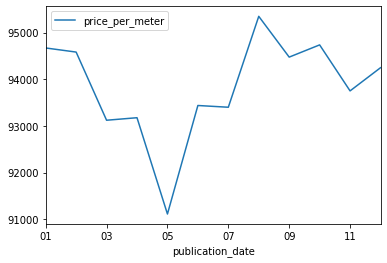

In [82]:
f = pd.to_datetime(data['publication_date']).dt.strftime('%m')
data.pivot_table(index=f, values='price_per_meter', aggfunc='median').plot()
#график зависимости цены от месяца публикации

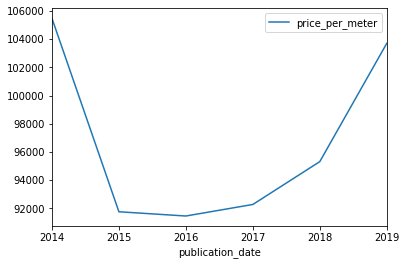

In [83]:
h = pd.to_datetime(data['publication_date']).dt.strftime('%Y')
data.pivot_table(index=h, values='price_per_meter', aggfunc='median').plot()
#график зависимости цены от года публикации

Обьявления о продажах, опубликованных в пятницу, имеют самую высокую цену среди других дней. Самую низкую - в воскресенье. 

С января стоимость недвижимость снижается до минимума в начале мая. Затем происоходит рост до максимальных значений в августе.

С начала 2014 года наблюдается падение стоимости недвижимости до конца года. В период с начала 2015 до 2017 соимость остается примерно на одном уровне. В начале 2017 недвижимость уверенно паднимается в стоимости.

In [84]:
list_name = data.pivot_table(index='locality_name', values='price_per_meter', aggfunc=['count', 'mean'])

In [85]:
list_name.columns = ['count', 'mean_price']

In [86]:
list_name['mean_price']=list_name['mean_price'].astype('int') 

In [87]:
top10 = (list_name.sort_values(by='count', ascending=False)).head(10) # топ 10 населённых пунктов сортированный в порядке убывания количества объявлений

In [88]:
top10

,count,mean_price
locality_name,,
Санкт-Петербург,13156,112105
посёлок Мурино,502,85892
посёлок Шушары,400,77775
Всеволожск,330,68615
Колпино,304,74795
посёлок Парголово,297,89386
Пушкин,294,101909
деревня Кудрово,290,92520
Гатчина,258,68064


Список 10 населённых пунктов с наибольшим числом объявлений со средней ценой квадратного метра.

In [89]:
top10.sort_values(by='mean_price', ascending=False)# список сортированный в порядке убывания средней цены квадратного метра 

,count,mean_price
locality_name,,
Санкт-Петербург,13156,112105
Пушкин,294,101909
деревня Кудрово,290,92520
посёлок Парголово,297,89386
посёлок Мурино,502,85892
посёлок Шушары,400,77775
Колпино,304,74795
Всеволожск,330,68615
Гатчина,258,68064


Населённый пункт с самой средней высокой стоимостью жилья - Санкт-Петербург	, самой низкой - Выборг.

In [90]:
data['cityCenters_nearest'] = (data['cityCenters_nearest']/1000).round()
#перевод расстояния до центра в км и округление в cityCenters_nearest

In [91]:
p = data.query('locality_name == "Санкт-Петербург"') # срез данных по локации Санкт-Петербург

In [92]:
c = p.pivot_table(index='cityCenters_nearest', values='last_price')#сводная таблица цены за метри расстоя
c.head(10)

,last_price
cityCenters_nearest,
0.0,2.239614e+07
1.0,1.915509e+07
2.0,1.784502e+07
3.0,1.034922e+07
4.0,1.287501e+07
5.0,1.342709e+07
6.0,1.454847e+07
7.0,1.362890e+07
8.0,9.359160e+06


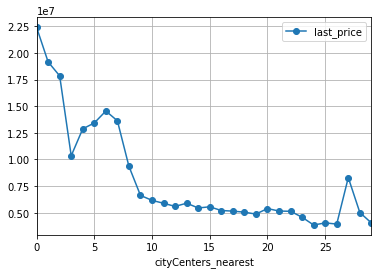

In [93]:
c.plot(style='o-', grid=True) #график изменения цены в зависимости от расстояния до центра 

В точке 7 км наблюдается резкое и устойчивое снижение стоимости недвижимости до 26 км. Примем 7км за границу центральной зоны.

In [94]:
data1 = data[['total_area', 'last_price', 'rooms', 'locality_name', 'ceiling_height', 'cityCenters_nearest']]
data1.query('(cityCenters_nearest < 7)&(locality_name == "Санкт-Петербург")').describe() 
#получение информации о параметрах недвижимости в центральной зоне (радиус 7км)

,total_area,last_price,rooms,ceiling_height,cityCenters_nearest
count,2445.000000,2.445000e+03,2445.000000,1519.000000,2445.000000
mean,90.756806,1.416610e+07,2.798364,3.117090,4.131697
std,57.721008,2.587616e+07,1.450717,0.717711,1.563128
min,12.000000,1.600000e+06,0.000000,2.400000,0.000000
25%,55.400000,6.500000e+06,2.000000,2.840000,3.000000
50%,77.000000,8.800000e+06,3.000000,3.000000,4.000000
75%,106.500000,1.310000e+07,3.000000,3.300000,5.000000
max,618.000000,7.630000e+08,19.000000,27.000000,6.000000


В центральной части города преобладают трехкомнатные квартиры общей площадью свыше 77кв.м с высотой потолков 3м и средней стоимостью от 8.8 миллиона рублей.

In [95]:
data.publication_date=pd.to_datetime(data.publication_date)
data.publication_date=pd.to_numeric(data.publication_date) #изменение формата даты

In [96]:
data2 = data.query('(cityCenters_nearest < 7)&(locality_name == "Санкт-Петербург")')
corr_price = data2.corr()
(corr_price.loc[:, 'price_per_meter']).sort_values(ascending=False) 
#Получение коэфициентов корреляции для центральной части города

price_per_meter        1.000000
last_price             0.819388
kitchen_area           0.334066
total_area             0.271134
living_area            0.193173
total_images           0.149220
floor                  0.147994
airports_nearest       0.145236
kitchen_index          0.137909
balcony                0.131949
floors_total           0.126570
ponds_around3000       0.100584
parks_around3000       0.096772
ceiling_height         0.074582
parks_nearest          0.028922
rooms                  0.019208
days_exposition        0.014731
publication_date       0.011137
open_plan             -0.001840
is_apartment          -0.002066
studio                -0.004194
cityCenters_nearest   -0.039286
ponds_nearest         -0.079871
plan_index            -0.136294
Name: price_per_meter, dtype: float64

Наиболее высокое значение коэфициента корреляции относительно цены кв.метра недвижимости в центральной части Санкт-Петербурга 
наблюдается у следующих параметров: площадь кухни, общая и жилая площади, этаж и расстояние до аэропорта.

Сравним зависимость цены за квадратный метр в целом по Санкт-Петербугу и его центральной частью.

In [97]:
data_corr_price = data.corr()
(data_corr_price.loc[:, 'price_per_meter']).sort_values(ascending=False) # корреляция цены за метр относительно других параметров

price_per_meter        1.000000
last_price             0.733812
kitchen_area           0.384564
total_area             0.299326
ponds_around3000       0.290075
parks_around3000       0.276078
living_area            0.215740
kitchen_index          0.161849
floors_total           0.155278
ceiling_height         0.137767
floor                  0.136335
total_images           0.127508
rooms                  0.050208
cityCenters_nearest    0.036196
balcony                0.032492
days_exposition        0.030658
parks_nearest          0.021617
is_apartment           0.020099
studio                 0.019523
open_plan              0.011706
publication_date       0.007894
airports_nearest      -0.040648
ponds_nearest         -0.102550
plan_index            -0.149232
Name: price_per_meter, dtype: float64

В обоих случаях самым значимым фактором является площадь недвижимости. Также к общим значимым фактором относится этаж. 
В отличии от ситуации со всем городом, в центральной части менее значимы наличие парков и водоемов поблизости. Значимым фактором для недвижимости в центре является количество фото.  

In [98]:
p = pd.to_datetime(data['publication_date']).dt.weekday_name  
data2.pivot_table(index=a, values='price_per_meter', aggfunc='median').sort_values(by='price_per_meter', ascending=False)
#сводная таблица с днем недели и стоимостью для центральной части города

,price_per_meter
publication_date,
Friday,124105.5
Wednesday,122753.5
Saturday,121134.0
Sunday,121033.0
Monday,119767.0
Thursday,117985.0
Tuesday,117340.0


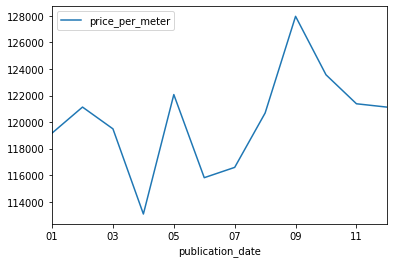

In [99]:
f = pd.to_datetime(data['publication_date']).dt.strftime('%m')
data2.pivot_table(index=f, values='price_per_meter', aggfunc='median').plot()
#график зависимости цены от месяца публикации для центральной части города

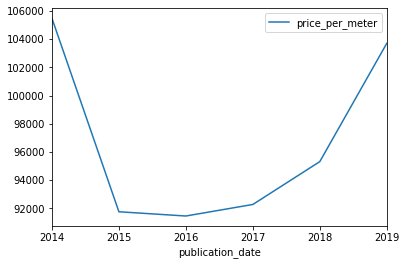

In [100]:
h = pd.to_datetime(data['publication_date']).dt.strftime('%Y')
data.pivot_table(index=h, values='price_per_meter', aggfunc='median').plot()
#график зависимости цены от года публикации для центральной части города

Обьявления о продажах квартир центральной части города, опубликованных в пятницу, имеют самую высокую цену среди других дней. Самую низкую - в четверг. 

В апреля наблюдается минимум, в сентябре - максимум. 

С начала 2014 года наблюдается резкое падение стоимости недвижимости, с начала 2015 года почти не снижается. С 2016 недвижимость плавно поднимается в стоимости. С 2018 происходит резкий рост.

### Шаг 5. Общий вывод

По результатам исследования установлены параметры, имеющие значение в формирование стоимость квадратного метра недвижимости. 
Ключевым фактором является локация квартиры относительно центра города. Также существенное значение имеет наличие водоема и парка в окрестностях. В конце августа происходит скачок спроса на недвижимость, что отражает график с ростом стоимости недвижимости. 

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санк-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод